In [13]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [14]:
load_dotenv()

model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key=os.getenv("GOOGLE_API_KEY")
)

In [15]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [16]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [17]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [18]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

In [19]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': '## Blog Outline: Rise of AI in India\n\n**I. Introduction (Hook & Context - ~150 words)**\n\n   *   **A. Hook:** Start with a compelling statistic, anecdote, or question that grabs the reader\'s attention.  Examples:\n        *   "India is poised to become a global AI powerhouse, but are we ready?"\n        *   "Imagine a future where AI-powered solutions revolutionize Indian agriculture, healthcare, and education. That future is closer than you think."\n        *   "By 2030, AI could contribute X% to India\'s GDP.  But what are the key drivers and challenges?"\n   *   **B. Briefly Define AI:**  A simple and accessible definition of Artificial Intelligence, avoiding technical jargon.\n   *   **C. Thesis Statement:** Clearly state the blog\'s main argument.  Example: "India is experiencing a rapid rise in AI adoption, driven by a confluence of factors including government initiatives, a burgeoning tech talent pool, and the potential to addres

In [20]:
print(final_state['outline'])

## Blog Outline: Rise of AI in India

**I. Introduction (Hook & Context - ~150 words)**

   *   **A. Hook:** Start with a compelling statistic, anecdote, or question that grabs the reader's attention.  Examples:
        *   "India is poised to become a global AI powerhouse, but are we ready?"
        *   "Imagine a future where AI-powered solutions revolutionize Indian agriculture, healthcare, and education. That future is closer than you think."
        *   "By 2030, AI could contribute X% to India's GDP.  But what are the key drivers and challenges?"
   *   **B. Briefly Define AI:**  A simple and accessible definition of Artificial Intelligence, avoiding technical jargon.
   *   **C. Thesis Statement:** Clearly state the blog's main argument.  Example: "India is experiencing a rapid rise in AI adoption, driven by a confluence of factors including government initiatives, a burgeoning tech talent pool, and the potential to address pressing societal challenges, but significant hurdles r

In [21]:
print(final_state['content'])

## The Rise of AI in India: A Nation Poised for Transformation

**I. Introduction (Hook & Context)**

Imagine a future where AI-powered robots assist surgeons in complex operations in rural India, or where personalized learning platforms cater to each student's unique needs, regardless of their location or socioeconomic background. This isn't a scene from a science fiction movie; it's a glimpse into the potential future being shaped by the rapid rise of Artificial Intelligence (AI) in India. By 2035, AI is projected to add a staggering $967 billion to India's GDP. But are we truly prepared to harness this transformative technology responsibly and equitably?

Artificial Intelligence, in its simplest form, refers to the ability of machines to perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. This blog explores the factors driving the burgeoning AI landscape in India, from government initiatives and a talented workforce to the

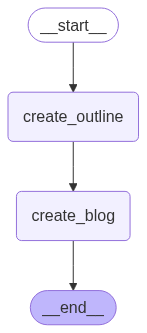

In [22]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())